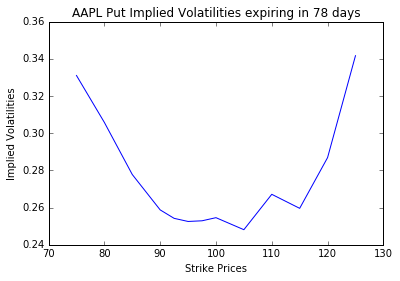

In [15]:
"""
Get implied volatilities from a Leisen-Reimer binomial
tree using the bisection method as the numerical procedure.
"""
from bisection import bisection
from BinomialLROption import BinomialLROption

class ImpliedVolatilityModel(object):

    def __init__(self, S0, r, T, div, N,
                 is_call=False):
        self.S0 = S0
        self.r = r
        self.T = T
        self.div = div
        self.N = N
        self.is_call = is_call

    def _option_valuation_(self, K, sigma):
        # Use the binomial Leisen-Reimer tree
        lr_option = BinomialLROption(
            self.S0, K, self.r,  self.T, self.N,
            {"sigma": sigma,
             "is_call": self.is_call,
             "div": self.div})
        return lr_option.price()

    def get_implied_volatilities(self, Ks, opt_prices):
        impvols = []
        for i in range(len(Ks)):
            # Bind f(sigma) for use by the bisection method
            f = lambda sigma: \
                self._option_valuation_(
                    Ks[i], sigma) - opt_prices[i]
            impv = bisection(f, 0.01, 0.99, 0.0001, 100)[0]
            impvols.append(impv)
        return impvols


    # The data
strikes = [75, 80, 85, 90, 92.5, 95, 97.5,
               100, 105, 110, 115, 120, 125]
put_prices = [0.16, 0.32, 0.6, 1.22, 1.77, 2.54, 3.55,
                  4.8, 7.75, 11.8, 15.96, 20.75, 25.81]

model = ImpliedVolatilityModel(99.62, 0.0248, 78/365.,
                                   0.0182, 77, is_call=False)
impvols_put = model.get_implied_volatilities(strikes,
                                                 put_prices)

    # Begin plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(strikes, impvols_put)
plt.xlabel('Strike Prices')
plt.ylabel('Implied Volatilities')
plt.title('AAPL Put Implied Volatilities expiring in 78 days')
plt.show()